# 0. Install and Import Dependencies

In [1]:
!pip list

Package                                  Version               Editable project location
---------------------------------------- --------------------- -------------------------
absl-py                                  1.4.0
accelerate                               0.22.0
access                                   1.1.9
affine                                   2.4.0
aiobotocore                              2.5.4
aiofiles                                 22.1.0
aiohttp                                  3.8.4
aiohttp-cors                             0.7.0
aioitertools                             0.11.0
aiorwlock                                1.3.0
aiosignal                                1.3.1
aiosqlite                                0.19.0
albumentations                           1.3.1
alembic                                  1.12.0
altair                                   5.1.1
annotated-types                          0.5.0
annoy                                    1.17.3
ansiwrap         

In [2]:
%pip install opencv-python matplotlib imageio gdown tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import imageio

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

# 1. Build Data Loading Functions

In [7]:
import gdown

In [8]:
url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output = 'data.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From (uriginal): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
From (redirected): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL&confirm=t&uuid=bc7524fb-eed0-4e74-b949-992a3779613a
To: /kaggle/working/data.zip
100%|██████████| 423M/423M [00:05<00:00, 84.7MB/s] 


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [9]:
def load_video(path:str) -> List[float]: 

    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))): 
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()
    
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [10]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [11]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [12]:
char_to_num.get_vocabulary()

['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [13]:
char_to_num(['n','i','c','k'])

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([14,  9,  3, 11])>

In [14]:
num_to_char([14,  9,  3, 11])

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'n', b'i', b'c', b'k'], dtype=object)>

In [15]:
def load_alignments(path:str) -> List[str]: 
    with open(path, 'r') as f: 
        lines = f.readlines() 
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil': 
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [16]:
def load_data(path: str): 
#     path = bytes.decode(path.numpy())
#     print(path)
    file_name = path.numpy().decode('utf-8').split('/')[-1].split('.')[0]
    # File name splitting for windows
#     file_name = path.split('\\')[-1].split('.')[0]
    video_path = os.path.join('data','s1',f'{file_name}.mpg')
    alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')
    frames = load_video(video_path) 
    alignments = load_alignments(alignment_path)
    
    return frames, alignments
#     return file_name

In [17]:
test_path = './data/s1/bbal6n.mpg'

In [18]:
# test_path = bytes.decode(test_path.numpy())

In [19]:
# hi = tf.convert_to_tensor(test_path).numpy().decode('utf-8')
# hi

In [20]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('/')[-1].split('.')[0]

'bbal6n'

In [21]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

In [22]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23])>

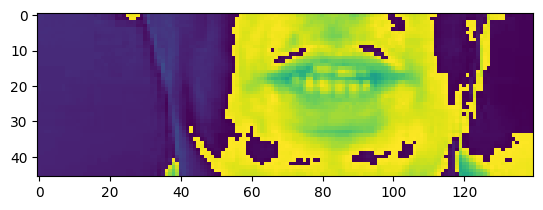

In [23]:
plt.imshow(frames[40])

In [24]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23])>

In [25]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

In [26]:
def mappable_function(path:str) ->List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

# 2. Create Data Pipeline

In [27]:
from matplotlib import pyplot as plt

In [28]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)
# Added for split 
train = data.take(450)
test = data.skip(450)

In [29]:
len(train)

450

In [30]:
frames, alignments = data.as_numpy_iterator().next()

In [31]:
len(frames)

2

In [32]:
sample = data.as_numpy_iterator()

In [33]:
val = sample.next(); val[0]

array([[[[[1.340357  ],
          [1.340357  ],
          [1.340357  ],
          ...,
          [0.31745297],
          [0.31745297],
          [0.3527255 ]],

         [[1.340357  ],
          [1.340357  ],
          [1.340357  ],
          ...,
          [0.38799807],
          [0.3527255 ],
          [0.24690786]],

         [[1.2345393 ],
          [1.2345393 ],
          [1.2345393 ],
          ...,
          [0.28218043],
          [0.24690786],
          [0.24690786]],

         ...,

         [[0.98763144],
          [0.98763144],
          [0.98763144],
          ...,
          [6.8076024 ],
          [7.9715967 ],
          [8.747593  ]],

         [[0.9523589 ],
          [0.9523589 ],
          [0.9523589 ],
          ...,
          [6.454877  ],
          [7.407236  ],
          [8.183232  ]],

         [[0.9523589 ],
          [0.9523589 ],
          [0.9523589 ],
          ...,
          [6.313787  ],
          [7.0545106 ],
          [7.7952337 ]]],


        [[[1.3403

In [34]:
# imageio.mimsave('./animation.gif', val[0][0], fps=10)

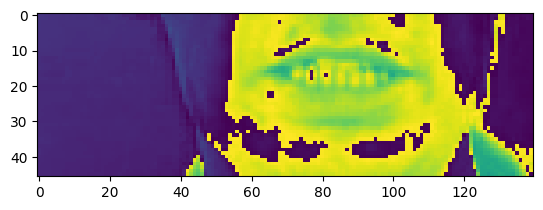

In [35]:
# 0:videos, 0: 1st video out of the batch,  0: return the first frame in the video 
plt.imshow(val[0][0][35])

In [36]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin white by t nine again'>

# 3. Design the Deep Neural Network

In [37]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [38]:
data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

In [39]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 75, 46, 140, 128)  3584      
                                                                 
 activation (Activation)     (None, 75, 46, 140, 128)  0         
                                                                 
 max_pooling3d (MaxPooling3D  (None, 75, 23, 70, 128)  0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_1 (Activation)   (None, 75, 23, 70, 256)   0         
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 75, 11, 35, 256)  0         
 3D)                                                    

In [41]:
5*17*75

6375

In [42]:
yhat = model.predict(val[0])

1/1 [==============================] - 6s 6s/step


In [43]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)])

<tf.Tensor: shape=(), dtype=string, numpy=b'uuuuuyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy'>

In [44]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'uuuuuyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy'>

In [45]:
model.input_shape

(None, 75, 46, 140, 1)

In [46]:
model.output_shape

(None, 75, 41)

# 4. Setup Training Options and Train

In [47]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [48]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [49]:
class ProduceExample(tf.keras.callbacks.Callback): 
    def __init__(self, dataset) -> None: 
        self.dataset = dataset.as_numpy_iterator()
    
    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):           
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

In [50]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), loss=CTCLoss)

In [51]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=True) 

In [52]:
schedule_callback = LearningRateScheduler(scheduler)

In [53]:
example_callback = ProduceExample(test)

In [54]:
model.fit(train, validation_data=test, epochs=96, callbacks=[checkpoint_callback, schedule_callback, example_callback])

Epoch 1/96
 86/450 [====>.........................] - ETA: 4:18 - loss: 112.1342

[mpeg1video @ 0x55e2445e4f40] ac-tex damaged at 22 17
[mpeg1video @ 0x55e2445e4f40] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 85.1955

[mpeg1video @ 0x7fafb006d5c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fafb006d5c0] Warning MVs not available
[mpeg1video @ 0x7fb10c078180] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb10c078180] Warning MVs not available


1/1 [==============================] - 2s 2s/step
Original: place white in p six now
Prediction: le e e e e o
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay blue sp with e six please
Prediction: le e e e o
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 760s 2s/step - loss: 85.1955 - val_loss: 71.5942 - lr: 1.0000e-04
Epoch 2/96
173/450 [==========>...................] - ETA: 3:18 - loss: 72.6446

[mpeg1video @ 0x7faf880fd280] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf880fd280] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 71.0840

[mpeg1video @ 0x7fb0581d77c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb0581d77c0] Warning MVs not available


1/1 [==============================] - 0s 121ms/step
Original: lay red with r nine soon
Prediction: la e e e e o
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place blue at p one again
Prediction: la e e e e o
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 548s 1s/step - loss: 71.0840 - val_loss: 64.8817 - lr: 1.0000e-04
Epoch 3/96
 91/450 [=====>........................] - ETA: 4:15 - loss: 67.9789

[mpeg1video @ 0x7faf68003200] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf68003200] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 67.2240

[mpeg1video @ 0x7fafa809df40] ac-tex damaged at 22 17
[mpeg1video @ 0x7fafa809df40] Warning MVs not available


1/1 [==============================] - 0s 119ms/step
Original: bin red with n three again
Prediction: la e e t e on
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay white in r four please
Prediction: la e e t e on
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 544s 1s/step - loss: 67.2240 - val_loss: 63.2823 - lr: 1.0000e-04
Epoch 4/96
202/450 [============>.................] - ETA: 2:56 - loss: 64.9651

[mpeg1video @ 0x7fb1300f0900] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb1300f0900] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 64.2933

[mpeg1video @ 0x7faf7006bd00] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf7006bd00] Warning MVs not available


1/1 [==============================] - 0s 124ms/step
Original: lay blue by k seven again
Prediction: la e e t e oan
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place blue with j five again
Prediction: la e e t e an
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 545s 1s/step - loss: 64.2933 - val_loss: 60.4680 - lr: 1.0000e-04
Epoch 5/96
306/450 [===================>..........] - ETA: 1:42 - loss: 62.4382

[mpeg1video @ 0x7fb10c1bd940] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb10c1bd940] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 61.9440

[mpeg1video @ 0x7faf54024140] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf54024140] Warning MVs not available


1/1 [==============================] - 0s 116ms/step
Original: lay blue by r one again
Prediction: la re t e e an
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay white in r five again
Prediction: la re t e an
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 542s 1s/step - loss: 61.9440 - val_loss: 57.6276 - lr: 1.0000e-04
Epoch 6/96
200/450 [============>.................] - ETA: 2:56 - loss: 60.1163

[mpeg1video @ 0x7fafb007d1c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fafb007d1c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 59.8636

[mpeg1video @ 0x7fb125a2ddc0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb125a2ddc0] Warning MVs not available


1/1 [==============================] - 0s 118ms/step
Original: set red in h one soon
Prediction: la re i e an
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay green with t one soon
Prediction: la re i e an
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 543s 1s/step - loss: 59.8636 - val_loss: 57.7013 - lr: 1.0000e-04
Epoch 7/96
422/450 [===========================>..] - ETA: 19s - loss: 58.2182

[mpeg1video @ 0x7faf702af140] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf702af140] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 58.1452

[mpeg1video @ 0x7fafbc026d80] ac-tex damaged at 22 17
[mpeg1video @ 0x7fafbc026d80] Warning MVs not available


1/1 [==============================] - 0s 124ms/step
Original: lay red sp with l five soon
Prediction: la re i e asn
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay green in r nine soon
Prediction: la re t e on
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 545s 1s/step - loss: 58.1452 - val_loss: 53.6593 - lr: 1.0000e-04
Epoch 8/96
408/450 [==========================>...] - ETA: 29s - loss: 56.4018

[mpeg1video @ 0x7faf5c0915c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf5c0915c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 56.3587

[mpeg1video @ 0x7fafa81088c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fafa81088c0] Warning MVs not available


1/1 [==============================] - 0s 118ms/step
Original: bin white by a five soon
Prediction: la re i e on
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin blue in f zero please
Prediction: la re i e ae
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 542s 1s/step - loss: 56.3587 - val_loss: 52.2985 - lr: 1.0000e-04
Epoch 9/96
298/450 [==================>...........] - ETA: 1:46 - loss: 55.0418

[mpeg1video @ 0x7fb128046040] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb128046040] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 54.5534

[mpeg1video @ 0x7fadb3b15c00] ac-tex damaged at 22 17
[mpeg1video @ 0x7fadb3b15c00] Warning MVs not available


1/1 [==============================] - 0s 125ms/step
Original: bin white sp with n six now
Prediction: set re t e aon
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay white by s two please
Prediction: sen re t e ae
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 540s 1s/step - loss: 54.5534 - val_loss: 47.9571 - lr: 1.0000e-04
Epoch 10/96
 22/450 [>.............................] - ETA: 4:59 - loss: 50.7712

[mpeg1video @ 0x7fafbc04a400] ac-tex damaged at 22 17
[mpeg1video @ 0x7fafbc04a400] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 50.4764

[mpeg1video @ 0x7faf500c5740] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf500c5740] Warning MVs not available


1/1 [==============================] - 0s 116ms/step
Original: place green at q six now
Prediction: la re t n o
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place green at q eight please
Prediction: la re t e eae
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 538s 1s/step - loss: 50.4764 - val_loss: 45.7617 - lr: 1.0000e-04
Epoch 11/96
 14/450 [..............................] - ETA: 5:05 - loss: 50.4029

[mpeg1video @ 0x7faf80043500] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf80043500] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 48.4628

[mpeg1video @ 0x7fb10c1a7bc0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb10c1a7bc0] Warning MVs not available


1/1 [==============================] - 0s 122ms/step
Original: lay green at f four now
Prediction: set re n o o
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin green at h zero now
Prediction: la re it on o
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 536s 1s/step - loss: 48.4628 - val_loss: 44.7726 - lr: 1.0000e-04
Epoch 12/96
 85/450 [====>.........................] - ETA: 4:16 - loss: 47.3887

[mpeg1video @ 0x7faf7027fdc0] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf7027fdc0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 46.6186

[mpeg1video @ 0x7fafb003b040] ac-tex damaged at 22 17
[mpeg1video @ 0x7fafb003b040] Warning MVs not available


1/1 [==============================] - 0s 116ms/step
Original: lay white with m one soon
Prediction: let re it o o
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin green with o three soon
Prediction: la re it on o
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 537s 1s/step - loss: 46.6186 - val_loss: 43.5727 - lr: 1.0000e-04
Epoch 13/96
 44/450 [=>............................] - ETA: 4:44 - loss: 45.7983

[mpeg1video @ 0x7faf4c01f0c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf4c01f0c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 44.3584

[mpeg1video @ 0x7faf7aac7e00] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf7aac7e00] Warning MVs not available


1/1 [==============================] - 0s 119ms/step
Original: place white in x two please
Prediction: la re t re plae
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place blue with c eight now
Prediction: plac ble it ie on
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 540s 1s/step - loss: 44.3584 - val_loss: 40.2542 - lr: 1.0000e-04
Epoch 14/96
410/450 [==========================>...] - ETA: 28s - loss: 42.3026

[mpeg1video @ 0x7fb10c1bd940] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb10c1bd940] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 42.1926

[mpeg1video @ 0x7faf64019c40] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf64019c40] Warning MVs not available


1/1 [==============================] - 0s 122ms/step
Original: lay red at e two now
Prediction: set re it o ow
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay red at y six please
Prediction: set re t e an
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 536s 1s/step - loss: 42.1926 - val_loss: 37.9253 - lr: 1.0000e-04
Epoch 15/96
186/450 [===========>..................] - ETA: 3:04 - loss: 41.1123

[mpeg1video @ 0x7fafb4053400] ac-tex damaged at 22 17
[mpeg1video @ 0x7fafb4053400] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 39.9234

[mpeg1video @ 0x7fb130cce640] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb130cce640] Warning MVs not available


1/1 [==============================] - 0s 119ms/step
Original: set white by i six please
Prediction: set re it oe pleae
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay green with t two please
Prediction: set re it or pleae
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 534s 1s/step - loss: 39.9234 - val_loss: 33.8579 - lr: 1.0000e-04
Epoch 16/96
 39/450 [=>............................] - ETA: 4:49 - loss: 38.7671

[mpeg1video @ 0x7faf7ab59780] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf7ab59780] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 37.6335

[mpeg1video @ 0x7fb058058880] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb058058880] Warning MVs not available


1/1 [==============================] - 0s 117ms/step
Original: bin red with g six now
Prediction: len re it in ow
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin blue by m zero now
Prediction: bit blue by oe ow
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 536s 1s/step - loss: 37.6335 - val_loss: 32.2507 - lr: 1.0000e-04
Epoch 17/96
325/450 [====================>.........] - ETA: 1:28 - loss: 35.2139

[mpeg1video @ 0x7faf5c035680] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf5c035680] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 35.3310

[mpeg1video @ 0x7fafb006a4c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fafb006a4c0] Warning MVs not available


1/1 [==============================] - 0s 122ms/step
Original: bin white at g five soon
Prediction: len re it eie son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place red with q three soon
Prediction: plac re it ie son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 539s 1s/step - loss: 35.3310 - val_loss: 29.4248 - lr: 1.0000e-04
Epoch 18/96
234/450 [==============>...............] - ETA: 2:31 - loss: 33.5974

[mpeg1video @ 0x7fb1280519c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb1280519c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 33.1856

[mpeg1video @ 0x7faea7422bc0] ac-tex damaged at 22 17
[mpeg1video @ 0x7faea7422bc0] Warning MVs not available


1/1 [==============================] - 0s 118ms/step
Original: set green with x three soon
Prediction: set re it re son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place blue with p six now
Prediction: place blue by io ow
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 535s 1s/step - loss: 33.1856 - val_loss: 26.9494 - lr: 1.0000e-04
Epoch 19/96
143/450 [========>.....................] - ETA: 3:33 - loss: 31.9843

[mpeg1video @ 0x7fb0441eea00] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb0441eea00] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 31.3043

[mpeg1video @ 0x7faf54097980] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf54097980] Warning MVs not available


1/1 [==============================] - 0s 118ms/step
Original: place red by x three soon
Prediction: place re by e on
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay red in e zero please
Prediction: sen re it ir please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 531s 1s/step - loss: 31.3043 - val_loss: 25.3467 - lr: 1.0000e-04
Epoch 20/96
288/450 [==================>...........] - ETA: 1:52 - loss: 28.7436

[mpeg1video @ 0x7fafac002b00] ac-tex damaged at 22 17
[mpeg1video @ 0x7fafac002b00] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 28.9096

[mpeg1video @ 0x7fb1101f4100] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb1101f4100] Warning MVs not available


1/1 [==============================] - 0s 121ms/step
Original: lay red with s zero please
Prediction: lay re it o please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place white with r zero please
Prediction: place gre it or please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 531s 1s/step - loss: 28.9096 - val_loss: 22.7949 - lr: 1.0000e-04
Epoch 21/96
304/450 [===================>..........] - ETA: 1:41 - loss: 27.0307

[mpeg1video @ 0x7faf7016af40] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf7016af40] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 27.0639

[mpeg1video @ 0x7fafbc078980] ac-tex damaged at 22 17
[mpeg1video @ 0x7fafbc078980] Warning MVs not available


1/1 [==============================] - 0s 120ms/step
Original: bin white with h three soon
Prediction: bin white with tre son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay white with s seven again
Prediction: lay white wit eie agin
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 538s 1s/step - loss: 27.0639 - val_loss: 22.0067 - lr: 1.0000e-04
Epoch 22/96
364/450 [=======================>......] - ETA: 1:00 - loss: 25.0067

[mpeg1video @ 0x7faf54001340] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf54001340] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 24.8791

[mpeg1video @ 0x7faf84015500] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf84015500] Warning MVs not available


1/1 [==============================] - 0s 122ms/step
Original: place green with l one soon
Prediction: place red it ene son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place white with q nine soon
Prediction: place white ith ie son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 537s 1s/step - loss: 24.8791 - val_loss: 19.1597 - lr: 1.0000e-04
Epoch 23/96
438/450 [============================>.] - ETA: 8s - loss: 22.9350

[mpeg1video @ 0x7fb1200babc0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb1200babc0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 22.8940

[mpeg1video @ 0x7faf5c02df00] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf5c02df00] Warning MVs not available


1/1 [==============================] - 0s 119ms/step
Original: set blue by h two now
Prediction: set blue by o now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: set blue with h eight please
Prediction: set blue it it please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 535s 1s/step - loss: 22.8940 - val_loss: 18.0147 - lr: 1.0000e-04
Epoch 24/96
 37/450 [=>............................] - ETA: 4:48 - loss: 21.9018

[mpeg1video @ 0x7fafbc0425c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fafbc0425c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 21.0697

[mpeg1video @ 0x7faf50116340] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf50116340] Warning MVs not available


1/1 [==============================] - 0s 115ms/step
Original: place white with e one soon
Prediction: place white with oe son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place white in j three soon
Prediction: place white with thre son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 540s 1s/step - loss: 21.0697 - val_loss: 16.4850 - lr: 1.0000e-04
Epoch 25/96
392/450 [=========================>....] - ETA: 40s - loss: 19.5278

[mpeg1video @ 0x7fafac007d00] ac-tex damaged at 22 17
[mpeg1video @ 0x7fafac007d00] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 19.4981

[mpeg1video @ 0x7fb0580a0f80] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb0580a0f80] Warning MVs not available


1/1 [==============================] - 0s 115ms/step
Original: place red in p one soon
Prediction: place red in ne son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place white with e two please
Prediction: place white wit to please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 539s 1s/step - loss: 19.4981 - val_loss: 15.4640 - lr: 1.0000e-04
Epoch 26/96
 77/450 [====>.........................] - ETA: 4:21 - loss: 18.2201

[mpeg1video @ 0x7fadb3b5db80] ac-tex damaged at 22 17
[mpeg1video @ 0x7fadb3b5db80] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 17.9257

[mpeg1video @ 0x7fafc0023940] ac-tex damaged at 22 17
[mpeg1video @ 0x7fafc0023940] Warning MVs not available


1/1 [==============================] - 0s 116ms/step
Original: lay blue at k three again
Prediction: lay blue at tre again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin green with i one again
Prediction: bin gren with one again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 540s 1s/step - loss: 17.9257 - val_loss: 13.1815 - lr: 1.0000e-04
Epoch 27/96
337/450 [=====================>........] - ETA: 1:19 - loss: 16.7400

[mpeg1video @ 0x55e23df34980] ac-tex damaged at 22 17
[mpeg1video @ 0x55e23df34980] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 16.7814

[mpeg1video @ 0x7faf84083380] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf84083380] Warning MVs not available


1/1 [==============================] - 0s 115ms/step
Original: place white in j five again
Prediction: place white it five again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin green in a four please
Prediction: bin gren in for please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 537s 1s/step - loss: 16.7814 - val_loss: 12.1376 - lr: 1.0000e-04
Epoch 28/96
206/450 [============>.................] - ETA: 2:51 - loss: 15.5050

[mpeg1video @ 0x7fb1101a1540] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb1101a1540] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 15.6964

[mpeg1video @ 0x7faf4c06fac0] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf4c06fac0] Warning MVs not available


1/1 [==============================] - 0s 116ms/step
Original: bin red at s six now
Prediction: bin red at six now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: set blue by h three soon
Prediction: set blue by tre son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 538s 1s/step - loss: 15.6964 - val_loss: 11.5575 - lr: 1.0000e-04
Epoch 29/96
293/450 [==================>...........] - ETA: 1:50 - loss: 14.6915

[mpeg1video @ 0x7fafa803af00] ac-tex damaged at 22 17
[mpeg1video @ 0x7fafa803af00] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 14.3988

[mpeg1video @ 0x7fb1207d2640] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb1207d2640] Warning MVs not available


1/1 [==============================] - 0s 119ms/step
Original: place red with x six now
Prediction: place red with six now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay red in y one soon
Prediction: lay red in one son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 539s 1s/step - loss: 14.3988 - val_loss: 10.0799 - lr: 1.0000e-04
Epoch 30/96
352/450 [======================>.......] - ETA: 1:09 - loss: 13.6119

[mpeg1video @ 0x7faea6f669c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7faea6f669c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 13.4218

[mpeg1video @ 0x7fb05808ad80] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb05808ad80] Warning MVs not available


1/1 [==============================] - 0s 123ms/step
Original: set red by i one again
Prediction: set red by one again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: set red with i two now
Prediction: set red with wo now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 540s 1s/step - loss: 13.4218 - val_loss: 11.4866 - lr: 1.0000e-04
Epoch 31/96
234/450 [==============>...............] - ETA: 2:32 - loss: 12.9117

[mpeg1video @ 0x7faf54067dc0] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf54067dc0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 12.5811

[mpeg1video @ 0x7fafa8039f40] ac-tex damaged at 22 17
[mpeg1video @ 0x7fafa8039f40] Warning MVs not available


1/1 [==============================] - 0s 117ms/step
Original: lay red at r zero now
Prediction: lay red at zero now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place red in p three again
Prediction: place red in hre again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 540s 1s/step - loss: 12.5811 - val_loss: 9.1893 - lr: 9.0484e-05
Epoch 32/96
114/450 [======>.......................] - ETA: 3:56 - loss: 11.6906

[mpeg1video @ 0x7fb12002af00] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb12002af00] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 11.5668

[mpeg1video @ 0x7faf6401dac0] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf6401dac0] Warning MVs not available


1/1 [==============================] - 0s 130ms/step
Original: bin white with n nine again
Prediction: bin white with nine again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place blue in b nine again
Prediction: place blue in nine again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 540s 1s/step - loss: 11.5668 - val_loss: 7.8694 - lr: 8.1873e-05
Epoch 33/96
 62/450 [===>..........................] - ETA: 4:34 - loss: 10.6531

[mpeg1video @ 0x7fafc401a6c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fafc401a6c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 10.8546

[mpeg1video @ 0x7fb1300e5c40] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb1300e5c40] Warning MVs not available


1/1 [==============================] - 0s 127ms/step
Original: lay blue with k nine soon
Prediction: lay blue with nine son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay red with f three again
Prediction: lay red with thre again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 540s 1s/step - loss: 10.8546 - val_loss: 7.0539 - lr: 7.4082e-05
Epoch 34/96
260/450 [================>.............] - ETA: 2:14 - loss: 10.0236

[mpeg1video @ 0x7faf80008a00] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf80008a00] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 10.1667

[mpeg1video @ 0x7fb11c087fc0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb11c087fc0] Warning MVs not available


1/1 [==============================] - 0s 117ms/step
Original: place white with y three soon
Prediction: place white with thre son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin green with h eight now
Prediction: bin gren with eight now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 540s 1s/step - loss: 10.1667 - val_loss: 7.2296 - lr: 6.7032e-05
Epoch 35/96
344/450 [=====================>........] - ETA: 1:14 - loss: 9.5860

[mpeg1video @ 0x7faf68043400] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf68043400] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 9.4515

[mpeg1video @ 0x7fafb003fd80] ac-tex damaged at 22 17
[mpeg1video @ 0x7fafb003fd80] Warning MVs not available


1/1 [==============================] - 0s 121ms/step
Original: bin red in l nine soon
Prediction: bin red in nine son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place blue in i three again
Prediction: place blue in thre again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 540s 1s/step - loss: 9.4515 - val_loss: 6.4875 - lr: 6.0653e-05
Epoch 36/96
160/450 [=========>....................] - ETA: 3:24 - loss: 8.9734

[mpeg1video @ 0x7faf4c581180] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf4c581180] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 9.0505

[mpeg1video @ 0x7faea6f9acc0] ac-tex damaged at 22 17
[mpeg1video @ 0x7faea6f9acc0] Warning MVs not available


1/1 [==============================] - 0s 115ms/step
Original: lay green in s one again
Prediction: lay gren in one again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay blue by q eight now
Prediction: lay blue by eight now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 540s 1s/step - loss: 9.0505 - val_loss: 5.7669 - lr: 5.4881e-05
Epoch 37/96
266/450 [================>.............] - ETA: 2:10 - loss: 8.4695

[mpeg1video @ 0x7fb1180149c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb1180149c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 8.4782

[mpeg1video @ 0x7faf5c016c40] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf5c016c40] Warning MVs not available


1/1 [==============================] - 0s 117ms/step
Original: set red in a six now
Prediction: set red in six now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin green with i zero please
Prediction: bin gren with zero please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 542s 1s/step - loss: 8.4782 - val_loss: 5.5085 - lr: 4.9659e-05
Epoch 38/96
274/450 [=================>............] - ETA: 2:04 - loss: 8.2205

[mpeg1video @ 0x7fafb4044680] ac-tex damaged at 22 17
[mpeg1video @ 0x7fafb4044680] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 8.2210

[mpeg1video @ 0x7fb125db8bc0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb125db8bc0] Warning MVs not available


1/1 [==============================] - 0s 116ms/step
Original: lay white by z seven again
Prediction: lay white by seven again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place blue in i one soon
Prediction: place blue in one son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 541s 1s/step - loss: 8.2210 - val_loss: 4.8387 - lr: 4.4933e-05
Epoch 39/96
116/450 [======>.......................] - ETA: 3:57 - loss: 8.0864

[mpeg1video @ 0x7faf800a7140] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf800a7140] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 7.7534

[mpeg1video @ 0x7fb10c07d800] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb10c07d800] Warning MVs not available


1/1 [==============================] - 0s 129ms/step
Original: bin blue at f five again
Prediction: bin blue at f five again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin blue at s three again
Prediction: bin blue at thre again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 542s 1s/step - loss: 7.7534 - val_loss: 4.8322 - lr: 4.0657e-05
Epoch 40/96
447/450 [============================>.] - ETA: 2s - loss: 7.3993

[mpeg1video @ 0x7faf6001c640] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf6001c640] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 7.3972

[mpeg1video @ 0x7fafb0163200] ac-tex damaged at 22 17
[mpeg1video @ 0x7fafb0163200] Warning MVs not available


1/1 [==============================] - 0s 127ms/step
Original: lay white at f zero please
Prediction: lay white at zero please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: set white at i three again
Prediction: set white at thre again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 543s 1s/step - loss: 7.3972 - val_loss: 4.3613 - lr: 3.6788e-05
Epoch 41/96
200/450 [============>.................] - ETA: 2:56 - loss: 7.2302

[mpeg1video @ 0x7fb1200c6e80] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb1200c6e80] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 7.1828

[mpeg1video @ 0x7faea6f97bc0] ac-tex damaged at 22 17
[mpeg1video @ 0x7faea6f97bc0] Warning MVs not available


1/1 [==============================] - 0s 115ms/step
Original: set blue in g seven again
Prediction: set blue in seven again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin white at a one soon
Prediction: bin white at a one son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 543s 1s/step - loss: 7.1828 - val_loss: 4.3238 - lr: 3.3287e-05
Epoch 42/96
125/450 [=======>......................] - ETA: 3:50 - loss: 7.2686

[mpeg1video @ 0x7fb044024880] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb044024880] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 6.8739

[mpeg1video @ 0x7faf54098640] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf54098640] Warning MVs not available


1/1 [==============================] - 0s 131ms/step
Original: place green in d seven again
Prediction: place gren in seven again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay green in z five again
Prediction: lay gren in five again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 540s 1s/step - loss: 6.8739 - val_loss: 4.1965 - lr: 3.0119e-05
Epoch 43/96
285/450 [==================>...........] - ETA: 1:56 - loss: 6.4387

[mpeg1video @ 0x7fafb40a24c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fafb40a24c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 6.5179

[mpeg1video @ 0x7fb125dd2a00] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb125dd2a00] Warning MVs not available


1/1 [==============================] - 0s 118ms/step
Original: place white at q zero now
Prediction: place white at zero now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: set green in o seven soon
Prediction: set gren in o seven son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 541s 1s/step - loss: 6.5179 - val_loss: 4.1021 - lr: 2.7253e-05
Epoch 44/96
408/450 [==========================>...] - ETA: 29s - loss: 6.3226

[mpeg1video @ 0x7faf70061780] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf70061780] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 6.3005

[mpeg1video @ 0x7fafc440f700] ac-tex damaged at 22 17
[mpeg1video @ 0x7fafc440f700] Warning MVs not available


1/1 [==============================] - 0s 131ms/step
Original: place red at c six now
Prediction: place red at c six now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: set green in v three again
Prediction: set gren in thre again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 544s 1s/step - loss: 6.3005 - val_loss: 3.4295 - lr: 2.4660e-05
Epoch 45/96
178/450 [==========>...................] - ETA: 3:12 - loss: 6.1629

[mpeg1video @ 0x7faf4c058bc0] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf4c058bc0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 6.1288

[mpeg1video @ 0x7faf8405c500] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf8405c500] Warning MVs not available


1/1 [==============================] - 0s 116ms/step
Original: bin red in f five soon
Prediction: bin red in f five son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place green with l three again
Prediction: place gren with l thre again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 542s 1s/step - loss: 6.1288 - val_loss: 3.5842 - lr: 2.2313e-05
Epoch 46/96
 53/450 [==>...........................] - ETA: 4:40 - loss: 5.8659

[mpeg1video @ 0x7fb120075400] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb120075400] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 5.9979

[mpeg1video @ 0x7fadb3a28cc0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fadb3a28cc0] Warning MVs not available


1/1 [==============================] - 0s 118ms/step
Original: lay green with t three again
Prediction: lay gren with thre again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay blue in d three soon
Prediction: lay blue in thre son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 541s 1s/step - loss: 5.9979 - val_loss: 3.1175 - lr: 2.0190e-05
Epoch 47/96
334/450 [=====================>........] - ETA: 1:22 - loss: 5.7999

[mpeg1video @ 0x7fafc0032000] ac-tex damaged at 22 17
[mpeg1video @ 0x7fafc0032000] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 5.7116

[mpeg1video @ 0x7fb13009c0c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb13009c0c0] Warning MVs not available


1/1 [==============================] - 0s 116ms/step
Original: place red at c eight please
Prediction: place red at c eight please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: set green with q zero please
Prediction: set gren with zero please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 543s 1s/step - loss: 5.7116 - val_loss: 3.7012 - lr: 1.8268e-05
Epoch 48/96
174/450 [==========>...................] - ETA: 3:15 - loss: 5.6131

[mpeg1video @ 0x7fafac0634c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fafac0634c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 5.5815

[mpeg1video @ 0x7fb10c1be180] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb10c1be180] Warning MVs not available


1/1 [==============================] - 0s 113ms/step
Original: place red with k one again
Prediction: place red with one again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: set green in c one again
Prediction: set gren in one again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 542s 1s/step - loss: 5.5815 - val_loss: 2.8747 - lr: 1.6530e-05
Epoch 49/96
140/450 [========>.....................] - ETA: 3:39 - loss: 5.7162

[mpeg1video @ 0x7fadb3a283c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fadb3a283c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 5.6103

[mpeg1video @ 0x7fafc0044d40] ac-tex damaged at 22 17
[mpeg1video @ 0x7fafc0044d40] Warning MVs not available


1/1 [==============================] - 0s 114ms/step
Original: lay white in e five soon
Prediction: lay white in five son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay red at r two please
Prediction: lay red at two please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 542s 1s/step - loss: 5.6103 - val_loss: 2.9940 - lr: 1.4957e-05
Epoch 50/96
262/450 [================>.............] - ETA: 2:12 - loss: 5.2824

[mpeg1video @ 0x7fb13007e800] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb13007e800] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 5.3198

[mpeg1video @ 0x7faf7a98db40] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf7a98db40] Warning MVs not available


1/1 [==============================] - 0s 113ms/step
Original: lay red at e four please
Prediction: lay red at four please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin white by g nine soon
Prediction: bin white by g nine son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 540s 1s/step - loss: 5.3198 - val_loss: 2.8131 - lr: 1.3534e-05
Epoch 51/96
308/450 [===================>..........] - ETA: 1:40 - loss: 5.2943

[mpeg1video @ 0x7fb11c03f6c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fb11c03f6c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 5.2782

[mpeg1video @ 0x7faf54144e00] ac-tex damaged at 22 17
[mpeg1video @ 0x7faf54144e00] Warning MVs not available


StopIteration: 

# 5. Make a Prediction 

In [ ]:
# url = 'https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
# output = 'checkpoints.zip'
# gdown.download(url, output, quiet=False)
# gdown.extractall('checkpoints.zip', 'models')

In [ ]:
# model.load_weights('./models/checkpoint')

In [55]:
test_data = test.as_numpy_iterator()

In [56]:
sample = test_data.next()

[mpeg1video @ 0x7faea7433c80] ac-tex damaged at 22 17
[mpeg1video @ 0x7faea7433c80] Warning MVs not available


In [72]:
sample[0].shape

TensorShape([75, 46, 140, 1])

In [73]:
sample[1].shape

TensorShape([23])

In [74]:
sample[1]

<tf.Tensor: shape=(23,), dtype=int64, numpy=
array([ 2,  9, 14, 39, 18,  5,  4, 39,  1, 20, 39, 19, 39, 14,  9, 14,  5,
       39,  1,  7,  1,  9, 14])>

In [57]:
yhat = model.predict(sample[0])

1/1 [==============================] - 0s 122ms/step


In [58]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'place red with k one again'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'place green at y zero now'>]

In [59]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()

In [60]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'place red with one again'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'place green at y zero now'>]

# Test on a Video

In [61]:
sample = load_data(tf.convert_to_tensor('./data/s1/bras9a.mpg'))

In [62]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample[1]]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin red at s nine again'>]

In [63]:
yhat = model.predict(tf.expand_dims(sample[0], axis=0))

1/1 [==============================] - 1s 521ms/step


In [64]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()

In [65]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin red at s nine again'>]